# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")


Number of cities in the list: 617


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL


url = "http://api.openweathermap.org/data/2.5/weather?"



# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url+f"q={city}&appid={weather_api_key}&units=metric"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat =city_weather['coord']['lat']
        city_lng =city_weather['coord']['lon']
        
        city_max_temp =city_weather['main']['temp']
        city_humidity =city_weather['main']['humidity']
        city_clouds =city_weather['clouds']['all']
        city_wind =city_weather['wind']['speed']
        city_country =city_weather['sys']['country']
        city_date =city_weather['timezone']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | pyay
Processing Record 2 of Set 1 | port-aux-francais
Processing Record 3 of Set 1 | hawaiian paradise park
Processing Record 4 of Set 1 | falam
Processing Record 5 of Set 1 | georgetown
Processing Record 6 of Set 1 | atafu village
Processing Record 7 of Set 1 | arkhangel'sk
Processing Record 8 of Set 1 | axim
Processing Record 9 of Set 1 | whitehorse
Processing Record 10 of Set 1 | waitangi
Processing Record 11 of Set 1 | puerto natales
Processing Record 12 of Set 1 | bethel
Processing Record 13 of Set 1 | albany
Processing Record 14 of Set 1 | saipan
Processing Record 15 of Set 1 | papatowai
Processing Record 16 of Set 1 | tostado
Processing Record 17 of Set 1 | tazovsky
Processing Record 18 of Set 1 | tyukhtet
Processing Record 19 of Set 1 | grytviken
Processing Record 20 of Set 1 | susuman
Processing Record 21 of Set 1 | yallahs
Processing Record 22 of Set 1 | puerto carreno
Processing Record

Processing Record 40 of Set 4 | kurayoshi
Processing Record 41 of Set 4 | awjilah
Processing Record 42 of Set 4 | ponta delgada
Processing Record 43 of Set 4 | prince rupert
Processing Record 44 of Set 4 | puerto san carlos
City not found. Skipping...
Processing Record 45 of Set 4 | vila velha
Processing Record 46 of Set 4 | veraval
Processing Record 47 of Set 4 | novofedorivka
Processing Record 48 of Set 4 | al matariyah
Processing Record 49 of Set 4 | donggang
Processing Record 0 of Set 5 | dunedin
Processing Record 1 of Set 5 | eyl
Processing Record 2 of Set 5 | cidreira
Processing Record 3 of Set 5 | naze
Processing Record 4 of Set 5 | kirensk
Processing Record 5 of Set 5 | torquay
Processing Record 6 of Set 5 | kalaleh
Processing Record 7 of Set 5 | skiathos
Processing Record 8 of Set 5 | pahrump
Processing Record 9 of Set 5 | stanley
Processing Record 10 of Set 5 | gueltat zemmour
City not found. Skipping...
Processing Record 11 of Set 5 | mehndawal
Processing Record 12 of Set 5 

Processing Record 33 of Set 8 | mahina
Processing Record 34 of Set 8 | opuwo
Processing Record 35 of Set 8 | beitbridge
Processing Record 36 of Set 8 | superior
Processing Record 37 of Set 8 | luanda
Processing Record 38 of Set 8 | mamonovo
Processing Record 39 of Set 8 | yarmouth
Processing Record 40 of Set 8 | shingu
Processing Record 41 of Set 8 | kamina
Processing Record 42 of Set 8 | new norfolk
Processing Record 43 of Set 8 | madang
Processing Record 44 of Set 8 | coquimbo
Processing Record 45 of Set 8 | tanrake village
City not found. Skipping...
Processing Record 46 of Set 8 | edissiya
Processing Record 47 of Set 8 | ubinskoye
Processing Record 48 of Set 8 | klaksvik
Processing Record 49 of Set 8 | vidyayevo
Processing Record 0 of Set 9 | newman
Processing Record 1 of Set 9 | luderitz
Processing Record 2 of Set 9 | sumenep
Processing Record 3 of Set 9 | dumas
Processing Record 4 of Set 9 | natal
Processing Record 5 of Set 9 | al hazm
Processing Record 6 of Set 9 | chernyshevski

Processing Record 23 of Set 12 | mugumu
Processing Record 24 of Set 12 | borcka
Processing Record 25 of Set 12 | shushtar
Processing Record 26 of Set 12 | yatou
Processing Record 27 of Set 12 | duki
Processing Record 28 of Set 12 | bandar abbas
Processing Record 29 of Set 12 | corner brook
Processing Record 30 of Set 12 | sidi akkacha
Processing Record 31 of Set 12 | taikang
Processing Record 32 of Set 12 | estancia
Processing Record 33 of Set 12 | masaya sur
Processing Record 34 of Set 12 | at taj
Processing Record 35 of Set 12 | vilyuysk
Processing Record 36 of Set 12 | bathurst city centre
City not found. Skipping...
Processing Record 37 of Set 12 | kulia village
City not found. Skipping...
Processing Record 38 of Set 12 | ahau
City not found. Skipping...
Processing Record 39 of Set 12 | bozyazi
Processing Record 40 of Set 12 | sambava
Processing Record 41 of Set 12 | seven pagodas
Processing Record 42 of Set 12 | shirgaon
Processing Record 43 of Set 12 | suntar
Processing Record 44

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
#print(city_data_df)

# Show Record Count
city_data_df.count()

City          591
Lat           591
Lng           591
Max Temp      591
Humidity      591
Cloudiness    591
Wind Speed    591
Country       591
Date          591
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,pyay,18.8167,95.2167,33.71,48,88,1.29,MM,23400
1,port-aux-francais,-49.3500,70.2167,7.16,97,100,15.07,TF,18000
2,hawaiian paradise park,19.5933,-154.9731,25.55,85,100,6.69,US,-36000
3,falam,22.9167,93.6833,29.77,36,40,1.06,MM,23400
4,georgetown,5.4112,100.3354,28.97,74,20,2.06,MY,28800


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,pyay,18.8167,95.2167,33.71,48,88,1.29,MM,23400
1,port-aux-francais,-49.3500,70.2167,7.16,97,100,15.07,TF,18000
2,hawaiian paradise park,19.5933,-154.9731,25.55,85,100,6.69,US,-36000
3,falam,22.9167,93.6833,29.77,36,40,1.06,MM,23400
4,georgetown,5.4112,100.3354,28.97,74,20,2.06,MY,28800


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

<Figure size 640x480 with 0 Axes>

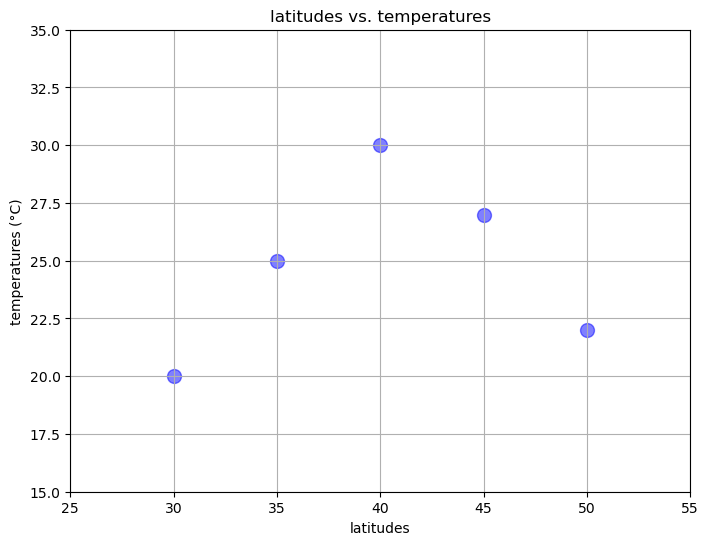

In [8]:
import matplotlib.pyplot as plt

# Sample data (replace this with your actual data)
latitudes = [30, 35, 40, 45, 50]
temperatures = [20, 25, 30, 27, 22]


# Incorporate the other graph properties
# YOUR CODE HERE
marker_size = 100
xlim = (25, 55)
ylim = (15, 35)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Plotting
plt.figure(figsize=(8, 6))
plt.scatter(latitudes, temperatures, color='blue', alpha=0.5, s=marker_size)
plt.title('latitudes vs. temperatures')
plt.xlim(xlim)
plt.ylim(ylim)
plt.xlabel('latitudes')
plt.ylabel('temperatures (°C)')
plt.grid(True)
plt.show()

#### Latitude Vs. Humidity

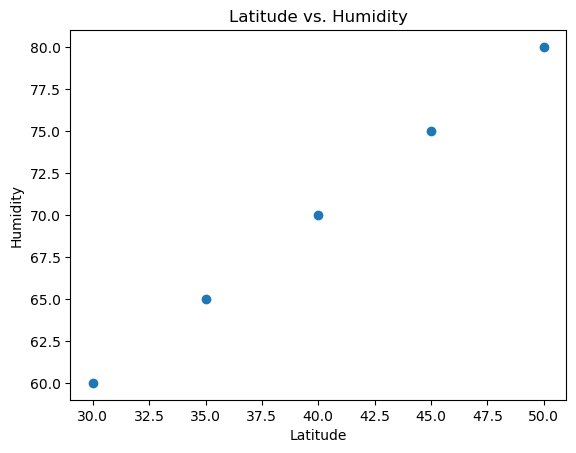

In [9]:
import matplotlib.pyplot as plt

# Incorporate the other graph properties
# YOUR CODE HERE show the code
latitude = [30, 35, 40, 45, 50]
humidity = [60, 65, 70, 75, 80]

# Create scatter plot
plt.scatter(latitude, humidity)

# Add labels and title
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Latitude vs. Humidity')

# Incorporate the other graph properties
# YOUR CODE HERE
marker_color = 'blue'
marker_size = 100
marker_style = '5'  # '4' for circle marker, '^' for triangle marker, etc.
alpha_value = 0.10   # Opacity of markers
xlim = (25, 55)
ylim = (55, 85)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

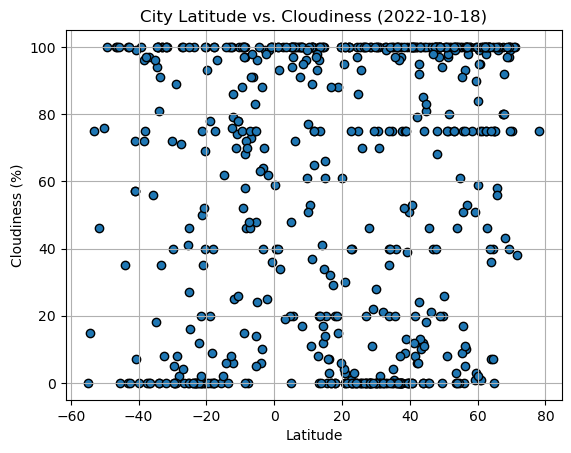

In [10]:
# Build the scatter plots for latitude vs. cloudiness
latitude = city_data_df['Lat']
cloudiness = city_data_df['Cloudiness']

# Incorporate the other graph properties
plt.scatter(latitude, cloudiness, edgecolors="black")
plt.title('City Latitude vs. Cloudiness (2022-10-18)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
# Save the figure
plt.savefig("output_data/Fig3.png")
plt.grid()
# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

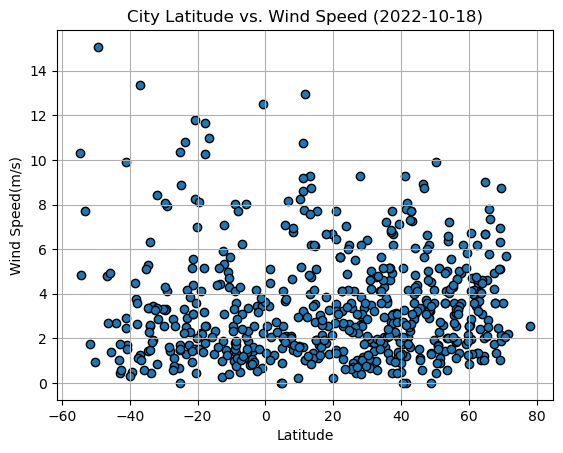

In [11]:
# Build the scatter plots for latitude vs. wind speed
latitude = city_data_df['Lat']
wind_speed = city_data_df['Wind Speed']

# Incorporate the other graph properties
plt.scatter(latitude, wind_speed, edgecolors="black")
plt.title('City Latitude vs. Wind Speed (2022-10-18)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed(m/s)')
# Save the figure
plt.savefig("output_data/Fig4.png")
plt.grid()
# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE

def plot_linear_regression(x_values, y_values, xlabel, ylabel, coordinates):
    
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,coordinates,fontsize=15,color="red")
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    
    print(f"The r-squared is: {rvalue**2}")
    plt.show()
    

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,pyay,18.8167,95.2167,33.71,48,88,1.29,MM,23400
2,hawaiian paradise park,19.5933,-154.9731,25.55,85,100,6.69,US,-36000
3,falam,22.9167,93.6833,29.77,36,40,1.06,MM,23400
4,georgetown,5.4112,100.3354,28.97,74,20,2.06,MY,28800
6,arkhangel'sk,64.5401,40.5433,2.06,80,40,2.00,RU,10800


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]


# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,port-aux-francais,-49.3500,70.2167,7.16,97,100,15.07,TF,18000
5,atafu village,-8.5421,-172.5159,28.75,75,100,3.60,TK,46800
9,waitangi,-43.9535,-176.5597,12.68,78,35,2.68,NZ,45900
10,puerto natales,-51.7236,-72.4875,1.39,95,46,1.75,CL,-10800
14,papatowai,-46.5619,169.4708,5.84,90,100,4.79,NZ,43200


###  Temperature vs. Latitude Linear Regression Plot

# Linear regression on Northern Hemisphere



The r-squared is: 0.7295250904783005


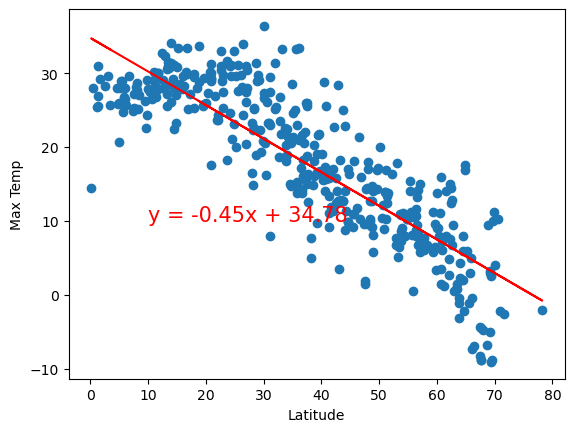

In [15]:
plot_linear_regression(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'], 'Latitude', 'Max Temp', (10, 10))

The r-squared is: 0.5836401202821189


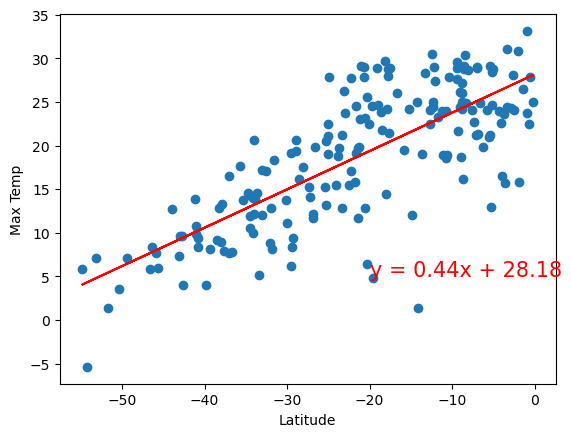

In [16]:
# Linear regression on Southern Hemisphere
plot_linear_regression(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'], 'Latitude', 'Max Temp', (-20,5))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.0005677782047281879


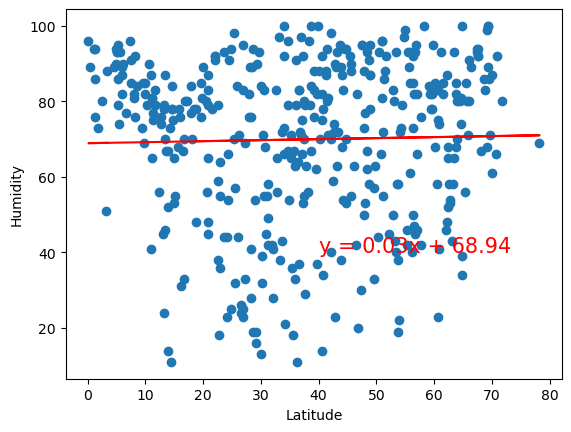

In [17]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df['Lat'], northern_hemi_df['Humidity'], 'Latitude', 'Humidity', (40,40))

The r-squared is: 0.03229915749848391


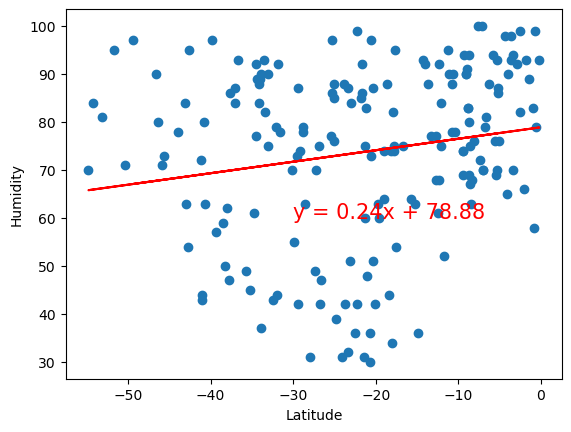

In [18]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df['Lat'], southern_hemi_df['Humidity'], 'Latitude', 'Humidity', (-30,60))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.022713197383155803


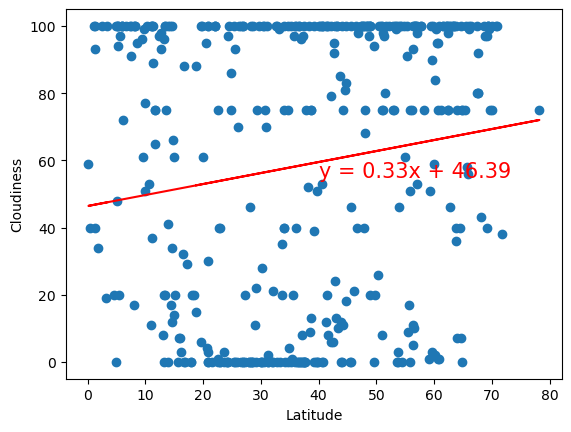

In [19]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'], 'Latitude', 'Cloudiness', (40,55))

The r-squared is: 0.01055916865142756


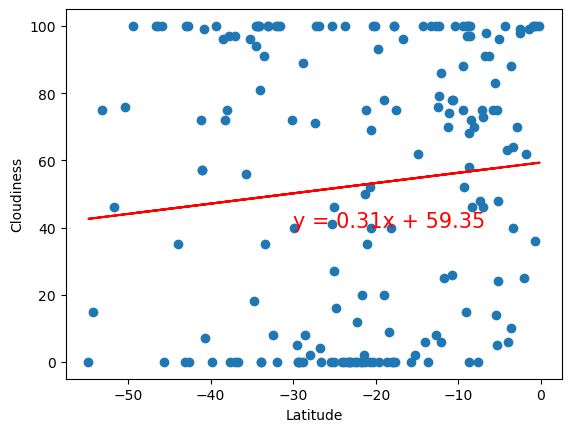

In [20]:
# southern Hemisphere
plot_linear_regression(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'], 'Latitude', 'Cloudiness', (-30,40))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.001695629999708751


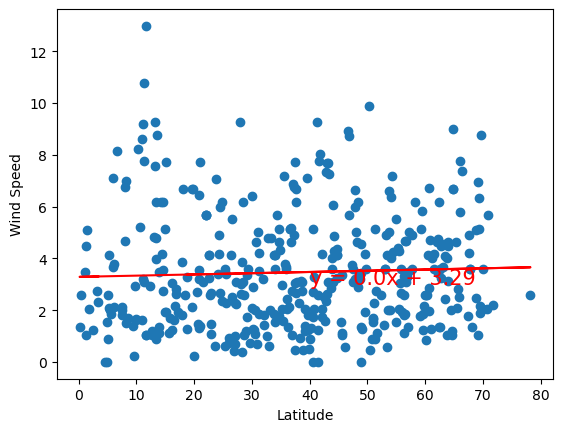

In [21]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'], 'Latitude', 'Wind Speed', (40,3))

The r-squared is: 0.011565958067765105


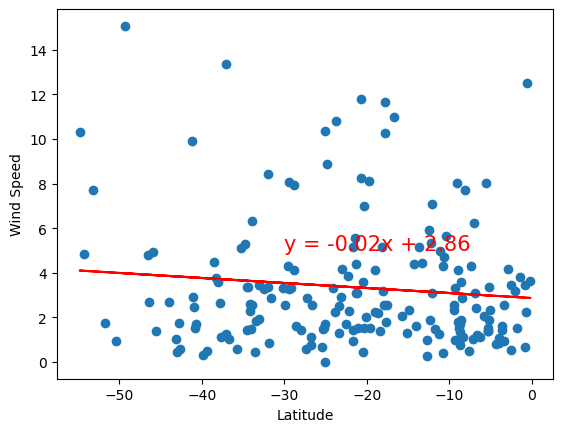

In [22]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'], 'Latitude', 'Wind Speed', (-30,5))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

In [ ]:

An R-squared value of 0.0306 indicates a very weak relationship between the variables. In statistical terms, this means that only about 3.06% of the variance in the dependent variable can be explained by the independent variable.it's likely that the relationship between the variables is not very meaningful or significant for practical purposes.It might suggest that there are other factors at play that are not accounted for in the current analysis.